# Traffic Accidents 

# Introductions

#some insightful questions for traffic accident analysis to guide data visualizations:
# General Overview
#1.What is the distribution of traffic accidents over time?
#2.What is the distribution of accidents by day of the week and time of day?
# Accident Severity and Impact
#1.What is the relationship between accident severity and the number of casualties?
#2.Which age groups are most frequently involved in severe accidents?
# Environmental Factors
#1.How do weather conditions impact accident frequency and severity?
#2.What is the relationship between road surface conditions and accident severity?
#3.How do lighting conditions (e.g., daylight, darkness) affect accidents?
# Road Infrastructure and Vehicle Analysis
#1.Which road classes (e.g., motorways, A-roads) have the highest number of accidents?
#2.What types of vehicles are most frequently involved in accidents?
# Casualty and Demographics
#1.What is the gender distribution of casualties in accidents?
#2.What are the most common casualty classes (e.g., driver, passenger, pedestrian)?
# Geographical Analysis
#1.Which regions or areas (grid reference) have the highest accident concentration?
#2.Are accidents concentrated in urban vs. rural areas?

# Importing Data 

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [154]:
df=pd.read_csv('traffic accident.csv')

In [155]:
df 

,Reference Number,Grid Ref: Easting,Grid Ref: Northing,Number of Vehicles,Number of Casualties,Accident Date,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle
0,1112091,429175,431904,2,1,01/01/2014,1840,6,2,4,2,1,3,1,58,9
1,1180869,430429,431025,3,2,08/01/2014,1430,1,2,1,1,1,3,1,69,9
2,1180869,430429,431025,3,2,08/01/2014,1430,1,2,1,1,1,3,2,41,9
3,11A0238,424660,427582,3,2,10/01/2014,817,1,1,1,1,1,3,1,35,9
4,11A0238,424660,427582,3,2,10/01/2014,817,1,1,1,1,1,3,1,25,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2528,1CV0080,428839,433995,1,1,31/12/2014,153,6,2,4,1,3,2,1,19,8
2529,1CV0542,436092,434785,2,1,31/12/2014,1310,6,2,1,1,2,3,2,15,9
2530,2130577,426119,426906,1,1,25/12/2014,830,6,1,1,1,2,3,1,71,8
2531,21D1298,430261,431186,1,1,27/12/2014,50,6,1,7,1,3,3,1,23,9


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2533 entries, 0 to 2532
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Reference Number      2533 non-null   object
 1   Grid Ref: Easting     2533 non-null   int64 
 2   Grid Ref: Northing    2533 non-null   int64 
 3   Number of Vehicles    2533 non-null   int64 
 4   Number of Casualties  2533 non-null   int64 
 5   Accident Date         2533 non-null   object
 6   Time (24hr)           2533 non-null   int64 
 7   1st Road Class        2533 non-null   int64 
 8   Road Surface          2533 non-null   int64 
 9   Lighting Conditions   2533 non-null   int64 
 10  Weather Conditions    2533 non-null   int64 
 11  Casualty Class        2533 non-null   int64 
 12  Casualty Severity     2533 non-null   int64 
 13  Sex of Casualty       2533 non-null   int64 
 14  Age of Casualty       2533 non-null   int64 
 15  Type of Vehicle       2533 non-null   

In [157]:
df.isnull().sum().sum()

0

In [158]:
df.describe()

,Grid Ref: Easting,Grid Ref: Northing,Number of Vehicles,Number of Casualties,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle
count,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000,2533.000000
mean,429857.021319,434335.987367,1.874457,1.740624,1389.835768,4.502171,1.290170,1.879589,1.311883,1.593368,2.858271,1.399921,35.086064,8.457560
std,4776.969426,4297.857221,0.728043,1.264816,533.778662,1.630238,0.515067,1.482690,1.168912,0.749715,0.373975,0.489979,18.466284,7.488925
min,414746.000000,423384.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,427197.000000,432021.000000,1.000000,1.000000,1025.000000,3.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,22.000000,8.000000
50%,429918.000000,434318.000000,2.000000,1.000000,1505.000000,6.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,31.000000,9.000000
75%,432064.000000,436243.000000,2.000000,2.000000,1800.000000,6.000000,2.000000,4.000000,1.000000,2.000000,3.000000,2.000000,47.000000,9.000000
max,445256.000000,449526.000000,8.000000,10.000000,2356.000000,6.000000,9.000000,7.000000,9.000000,3.000000,3.000000,2.000000,97.000000,97.000000


# General Overview

#What is the distribution of traffic accidents over time?

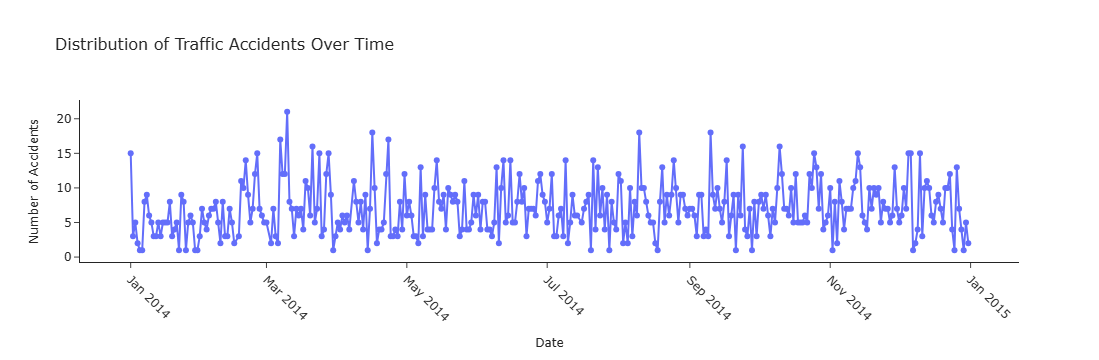

In [159]:

# Ensure 'Accident Date' is in datetime format
df['Accident Date'] = pd.to_datetime(df['Accident Date'], format='%d/%m/%Y', errors='coerce')

# Aggregate the number of accidents by date
daily_accidents = df.groupby('Accident Date').size().reset_index(name='Number of Accidents')

# Plot the distribution of traffic accidents over time using Plotly
fig = px.line(
    daily_accidents,
    x='Accident Date',
    y='Number of Accidents',
    title='Distribution of Traffic Accidents Over Time',
    labels={'Accident Date': 'Date', 'Number of Accidents': 'Number of Accidents'},
    markers=True
)

# Customize layout
fig.update_layout(
    xaxis_title="Date",
    yaxis_title="Number of Accidents",
    title_font_size=16,
    xaxis=dict(title_font_size=12, tickangle=45),
    yaxis=dict(title_font_size=12),
    template="simple_white"
)

# Show the plot
fig.show()


#What is the distribution of accidents by day of the week and time of day?

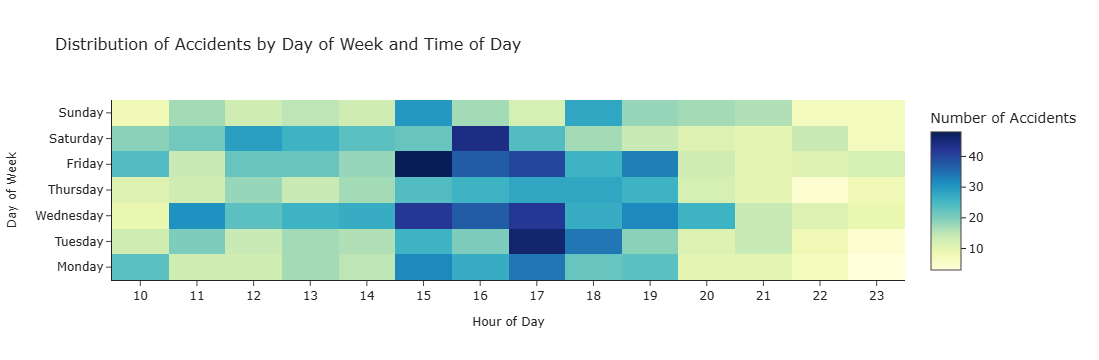

In [160]:
import pandas as pd
import plotly.graph_objects as go

# Ensure 'Accident Date' is in datetime format
df['Accident Date'] = pd.to_datetime(df['Accident Date'], errors='coerce')

# Drop rows with invalid dates
df = df.dropna(subset=['Accident Date'])

# Create 'Day of Week'
df['Day of Week'] = df['Accident Date'].dt.day_name()

# Create 'Hour' if not already done
df['Time (24hr)'] = df['Time (24hr)'].astype(str)
df['Time (24hr)'] = df['Time (24hr)'].apply(lambda x: f"{x[:-2]}:{x[-2:]}" if len(x) == 4 else x)
df['Hour'] = pd.to_datetime(df['Time (24hr)'], format='%H:%M', errors='coerce').dt.hour

# Drop rows with invalid 'Hour'
df = df.dropna(subset=['Hour'])

# Group the data by day of the week and hour
accidents_by_time = df.groupby(['Day of Week', 'Hour']).size().unstack(fill_value=0)

# Reorder the days of the week for better visualization
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
accidents_by_time = accidents_by_time.reindex(days_order)

# Create the heatmap using Plotly
fig = go.Figure(
    data=go.Heatmap(
        z=accidents_by_time.values,
        x=accidents_by_time.columns,
        y=accidents_by_time.index,
        colorscale="YlGnBu",
        colorbar=dict(title="Number of Accidents")
    )
)

# Customize layout
fig.update_layout(
    title="Distribution of Accidents by Day of Week and Time of Day",
    xaxis_title="Hour of Day",
    yaxis_title="Day of Week",
    title_font_size=16,
    xaxis=dict(title_font_size=12, tickmode="linear", tick0=0, dtick=1),
    yaxis=dict(title_font_size=12, categoryorder='array', categoryarray=days_order),
    template="simple_white"
)

# Show the plot
fig.show()


# Accident Severity and Impact

#relationship between accident severity and the number of casualties

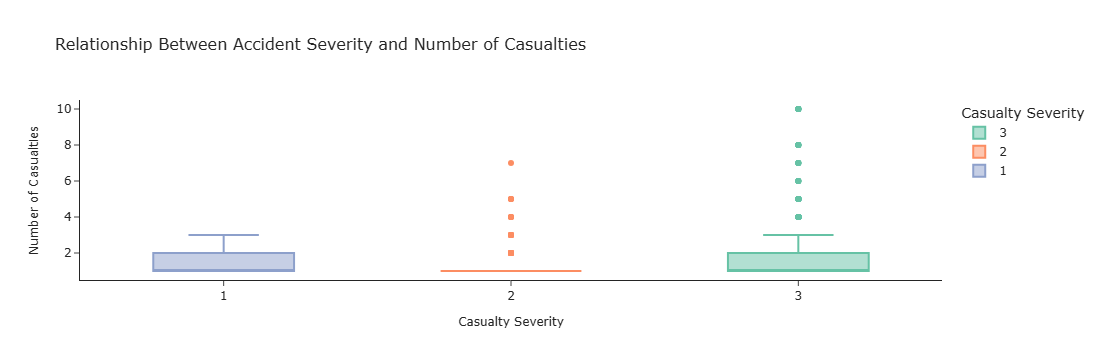

In [161]:


# Ensure 'Number of Casualties' is numeric
df['Number of Casualties'] = pd.to_numeric(df['Number of Casualties'], errors='coerce')

# Create the box plot using Plotly
fig = px.box(
    df,
    x='Casualty Severity',
    y='Number of Casualties',
    color='Casualty Severity',  # Add hue-like functionality
    color_discrete_sequence=px.colors.qualitative.Set2,  # Use the Set2 palette
    title="Relationship Between Accident Severity and Number of Casualties",
    labels={
        'Casualty Severity': 'Casualty Severity',
        'Number of Casualties': 'Number of Casualties'
    }
)

# Customize layout
fig.update_layout(
    xaxis_title="Casualty Severity",
    yaxis_title="Number of Casualties",
    title_font_size=16,
    xaxis=dict(title_font_size=12),
    yaxis=dict(title_font_size=12),
    template="simple_white"
)

# Show the plot
fig.show()


#Which age groups are most frequently involved in severe accidents?

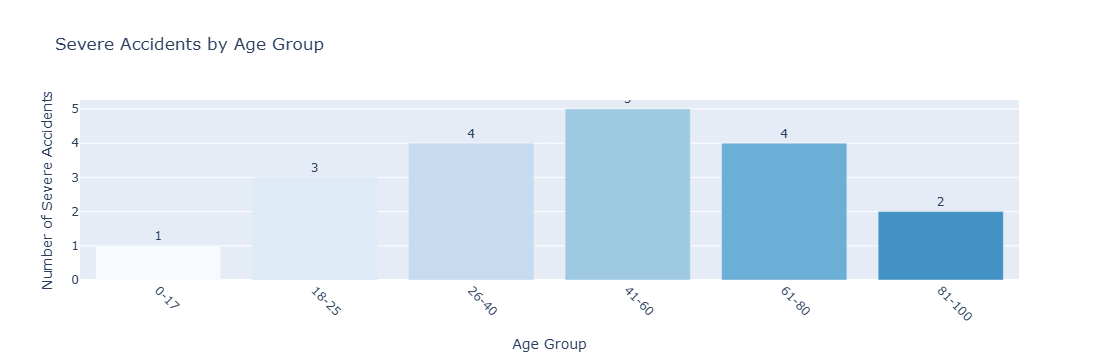

In [162]:

# Define age bins and labels for grouping
age_bins = [0, 17, 25, 40, 60, 80, 100]
age_labels = ['0-17', '18-25', '26-40', '41-60', '61-80', '81-100']

# Explicitly create a copy to avoid the warning
data = df.copy()

# Add a new column for age groups using .loc[]
data['Age Group'] = pd.cut(data['Age of Casualty'], bins=age_bins, labels=age_labels, right=False)

# Filter for severe accidents (assuming severity 1 is most severe)
severe_accidents = data[data['Casualty Severity'] == 1]

# Count the number of severe accidents by age group
age_group_counts = severe_accidents['Age Group'].value_counts().sort_index()

# Convert the data into a DataFrame for Plotly
age_group_df = age_group_counts.reset_index()
age_group_df.columns = ['Age Group', 'Number of Severe Accidents']

# Plot the data using Plotly
fig = px.bar(
    age_group_df,
    x='Age Group',
    y='Number of Severe Accidents',
    text='Number of Severe Accidents',
    title='Severe Accidents by Age Group',
    labels={'Age Group': 'Age Group', 'Number of Severe Accidents': 'Number of Severe Accidents'},
    color='Age Group',
    color_discrete_sequence=px.colors.sequential.Blues
)


# Customize layout
fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title="Age Group",
    yaxis_title="Number of Severe Accidents",
    xaxis=dict(tickangle=45),
    showlegend=False
)

# Show the plot
fig.show()


# Environmental Factors

#How do weather conditions impact accident frequency and severity?

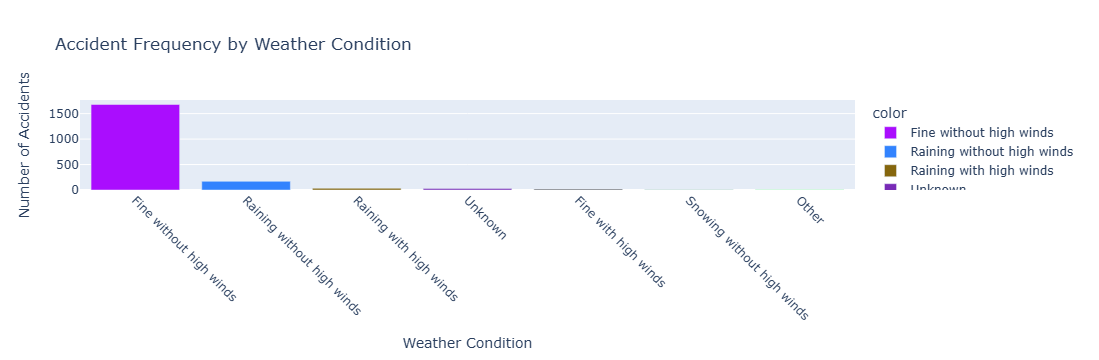

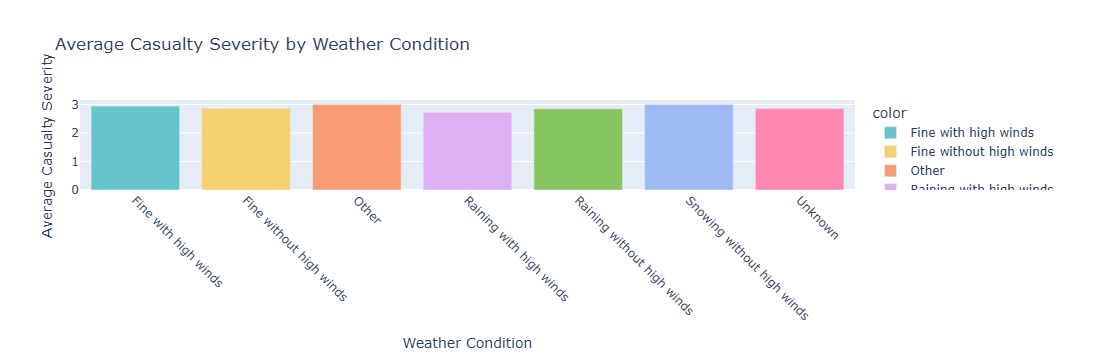

In [163]:

# Map Weather Conditions codes to descriptions for clarity
weather_conditions_map = {
    1: "Fine without high winds",
    2: "Raining without high winds",
    3: "Snowing without high winds",
    4: "Fine with high winds",
    5: "Raining with high winds",
    6: "Snowing with high winds",
    7: "Fog or mist",
    8: "Other",
    9: "Unknown"
}
data['Weather Description'] = data['Weather Conditions'].map(weather_conditions_map)

# Accident frequency by weather condition
weather_accidents = data['Weather Description'].value_counts()

# Plotting accident frequency by weather condition with Plotly
fig1 = px.bar(
    x=weather_accidents.index,
    y=weather_accidents.values,
    labels={'x': 'Weather Condition', 'y': 'Number of Accidents'},
    title='Accident Frequency by Weather Condition',
    color=weather_accidents.index,
    color_discrete_sequence=px.colors.qualitative.Alphabet  # Customize colors
)
fig1.update_layout(xaxis_tickangle=45)
fig1.show()

# Severity analysis: Average Casualty Severity by Weather Condition
severity_weather = data.groupby('Weather Description')['Casualty Severity'].mean()

# Plotting average casualty severity by weather condition with Plotly
fig2 = px.bar(
    x=severity_weather.index,
    y=severity_weather.values,
    labels={'x': 'Weather Condition', 'y': 'Average Casualty Severity'},
    title='Average Casualty Severity by Weather Condition',
    color=severity_weather.index,
    color_discrete_sequence=px.colors.qualitative.Pastel  # Customize colors
)
fig2.update_layout(xaxis_tickangle=45)
fig2.show()


#How do lighting conditions (e.g., daylight, darkness) affect accidents?

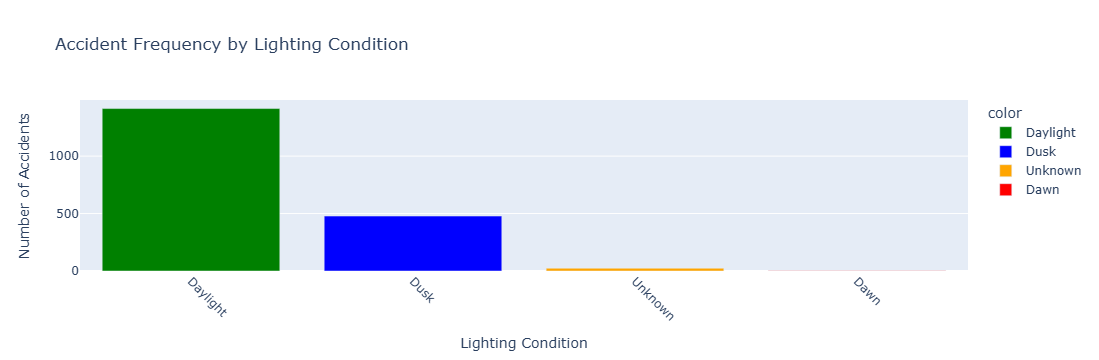

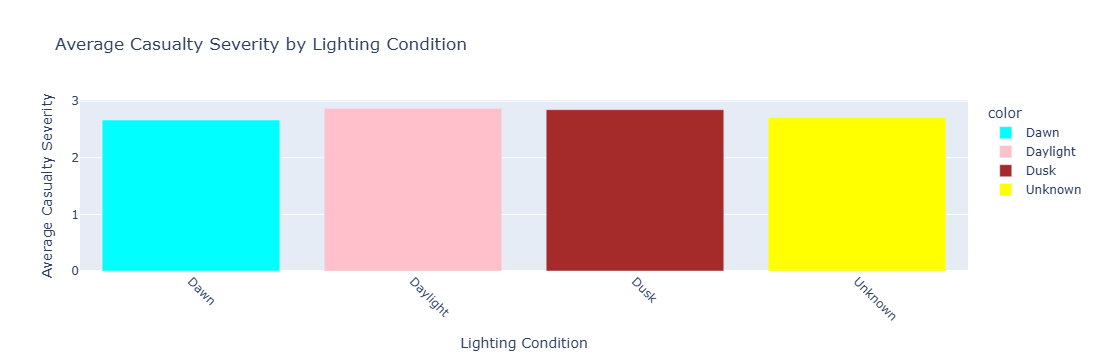

In [164]:
import plotly.express as px
import plotly.graph_objects as go

# Map Lighting Conditions codes to descriptions for clarity
lighting_conditions_map = {
    1: "Daylight",
    2: "Darkness - lit streets",
    3: "Darkness - unlit streets",
    4: "Dusk",
    5: "Dawn",
    6: "Unknown"
}
data['Lighting Description'] = data['Lighting Conditions'].map(lighting_conditions_map)

# Accident frequency by lighting condition
lighting_accidents = data['Lighting Description'].value_counts()

# Visualizing accident frequency with Plotly
fig1 = px.bar(
    x=lighting_accidents.index,
    y=lighting_accidents.values,
    labels={'x': 'Lighting Condition', 'y': 'Number of Accidents'},
    title='Accident Frequency by Lighting Condition',
    color=lighting_accidents.index,  # Adding color to differentiate the categories
    color_discrete_sequence=['green', 'blue', 'orange', 'red', 'purple', 'yellow']
)
fig1.update_layout(xaxis_tickangle=45)
fig1.show()

# Average casualty severity by lighting condition
severity_lighting = data.groupby('Lighting Description')['Casualty Severity'].mean()

# Visualizing average casualty severity with Plotly
fig2 = px.bar(
    x=severity_lighting.index,
    y=severity_lighting.values,
    labels={'x': 'Lighting Condition', 'y': 'Average Casualty Severity'},
    title='Average Casualty Severity by Lighting Condition',
    color=severity_lighting.index,  # Adding color to differentiate the categories
    color_discrete_sequence=['cyan', 'pink', 'brown', 'yellow', 'lime', 'gray']
)
fig2.update_layout(xaxis_tickangle=45)
fig2.show()


# Road Infrastructure and Vehicle Analysis

#Which road classes (e.g., motorways, A-roads) have the highest number of accidents?

In [166]:
df

,Reference Number,Grid Ref: Easting,Grid Ref: Northing,Number of Vehicles,Number of Casualties,Accident Date,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle,Day of Week,Hour
0,1112091,429175,431904,2,1,2014-01-01,18:40,6,2,4,2,1,3,1,58,9,Wednesday,18.0
1,1180869,430429,431025,3,2,2014-01-08,14:30,1,2,1,1,1,3,1,69,9,Wednesday,14.0
2,1180869,430429,431025,3,2,2014-01-08,14:30,1,2,1,1,1,3,2,41,9,Wednesday,14.0
5,11A0628,432917,425961,2,1,2014-01-10,12:20,1,1,1,1,1,3,1,20,9,Friday,12.0
6,11S1208,432248,427099,3,1,2014-01-28,18:28,1,2,4,2,1,3,1,38,9,Tuesday,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2525,1CT1319,425800,428414,2,1,2014-12-29,20:25,4,2,4,1,1,3,1,28,9,Monday,20.0
2526,1CU0553,421674,434229,1,1,2014-12-30,13:35,6,2,1,1,3,3,2,73,9,Tuesday,13.0
2527,1CU0802,429119,430977,2,1,2014-12-30,15:54,6,2,1,1,1,3,2,55,9,Tuesday,15.0
2529,1CV0542,436092,434785,2,1,2014-12-31,13:10,6,2,1,1,2,3,2,15,9,Wednesday,13.0


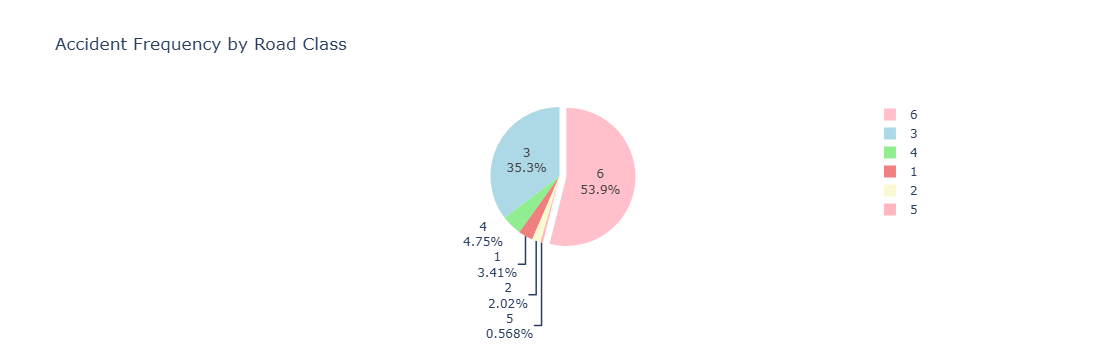

In [167]:
# Assuming the correct column name is '1st Road Class'
road_class_accidents = df['1st Road Class'].value_counts().reset_index()
road_class_accidents.columns = ['Road Class', 'Number of Accidents']

# Create a pie plot using plotly
fig = px.pie(road_class_accidents, 
             names='Road Class', 
             values='Number of Accidents', 
             title='Accident Frequency by Road Class',
             color='Road Class', 
             color_discrete_sequence=['pink', 'lightblue', 'lightgreen', 'lightcoral', 'lightgoldenrodyellow', 'lightpink'])

# Show the plot
fig.update_traces(textinfo='percent+label', pull=[0.1, 0, 0, 0, 0, 0])  # Pull to highlight the first slice
fig.show()


#What types of vehicles are most frequently involved in accidents?

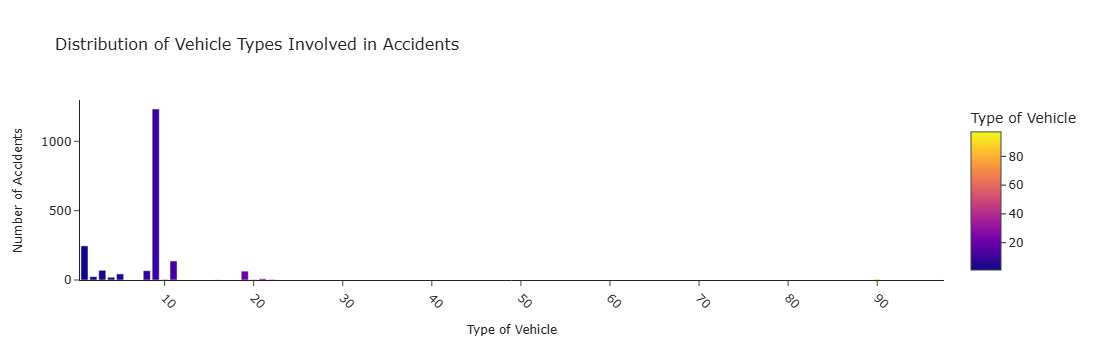

In [169]:
# Count the frequency of each vehicle type
vehicle_counts = df['Type of Vehicle'].value_counts().reset_index()
vehicle_counts.columns = ['Vehicle Type', 'Number of Accidents']

# Create a bar chart using Plotly
fig = px.bar(
    vehicle_counts,
    x='Vehicle Type',
    y='Number of Accidents',
    title='Distribution of Vehicle Types Involved in Accidents',
    labels={'Vehicle Type': 'Type of Vehicle', 'Number of Accidents': 'Number of Accidents'},
    color='Vehicle Type',
    color_discrete_sequence=px.colors.sequential.RdBu
)

# Customize layout
fig.update_layout(
    xaxis_title="Type of Vehicle",
    yaxis_title="Number of Accidents",
    title_font_size=16,
    xaxis=dict(title_font_size=12, tickangle=45),
    yaxis=dict(title_font_size=12),
    template="simple_white",
    showlegend=False
)

# Show the plot
fig.show()


# Casualty and Demographics

#What is the gender distribution of casualties in accidents

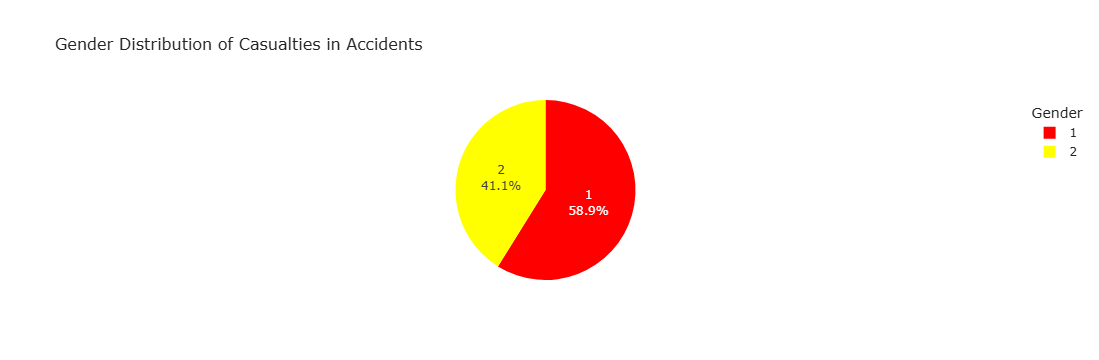

In [170]:

# Count the frequency of each gender
gender_counts = df['Sex of Casualty'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Number of Casualties']
# Create a pie chart for gender distribution
fig_pie = px.pie(
    gender_counts,
    names='Gender',
    values='Number of Casualties', 
    title='Gender Distribution of Casualties in Accidents',
    color_discrete_sequence=['red', 'yellow']
)

# Customize layout for the pie chart
fig_pie.update_traces(textinfo='percent+label')
fig_pie.update_layout(
    title_font_size=16,
    legend_title="Gender",
    legend=dict(font_size=12),
    template="simple_white"
)

# Show the pie chart
fig_pie.show()


#What are the most common casualty classes (e.g., driver, passenger, pedestrian)?

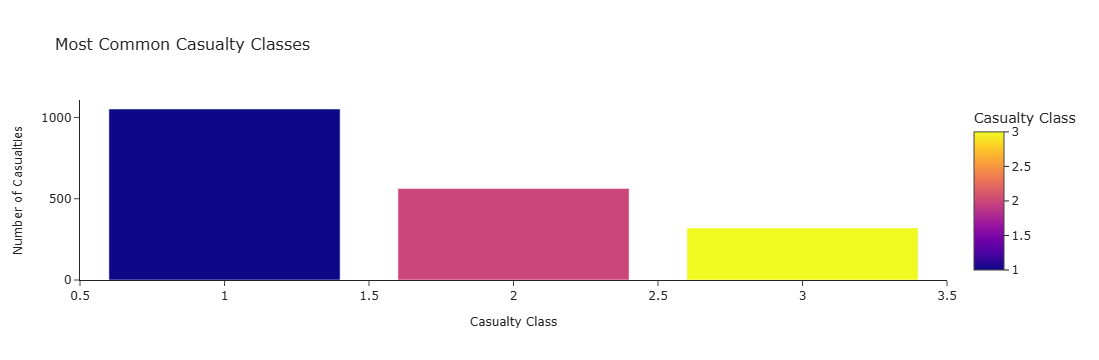

In [171]:
# Count the frequency of each casualty class
casualty_class_counts = df['Casualty Class'].value_counts().reset_index()
casualty_class_counts.columns = ['Casualty Class', 'Number of Casualties']
# Create a bar chart for casualty classes
fig_bar = px.bar(
    casualty_class_counts,
    x='Casualty Class',
    y='Number of Casualties',
    title='Most Common Casualty Classes',
    labels={'Casualty Class': 'Casualty Class', 'Number of Casualties': 'Number of Casualties'},
    color='Casualty Class',
    color_discrete_sequence=px.colors.sequential.Viridis
)

# Customize layout for the bar chart
fig_bar.update_layout(
    xaxis_title="Casualty Class",
    yaxis_title="Number of Casualties",
    title_font_size=16,
    xaxis=dict(title_font_size=12),
    yaxis=dict(title_font_size=12),
    template="simple_white",
    showlegend=False
)

# Show the bar chart
fig_bar.show()

# Geographical Analysis

#Which regions or areas (grid reference) have the highest accident concentration?

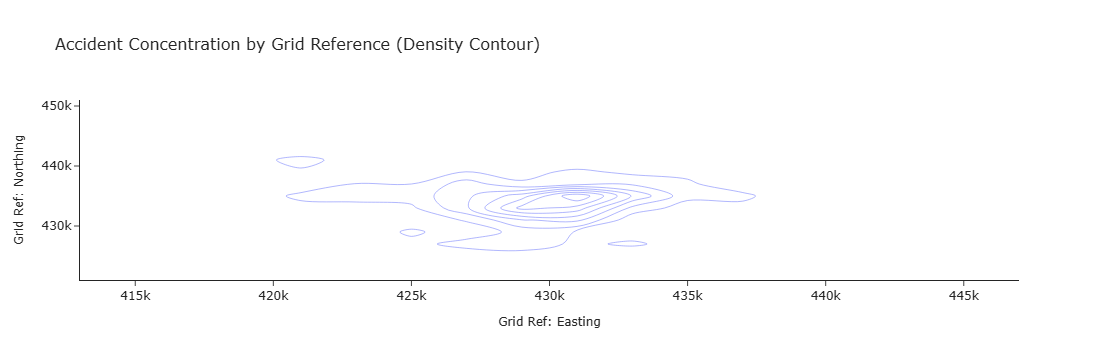

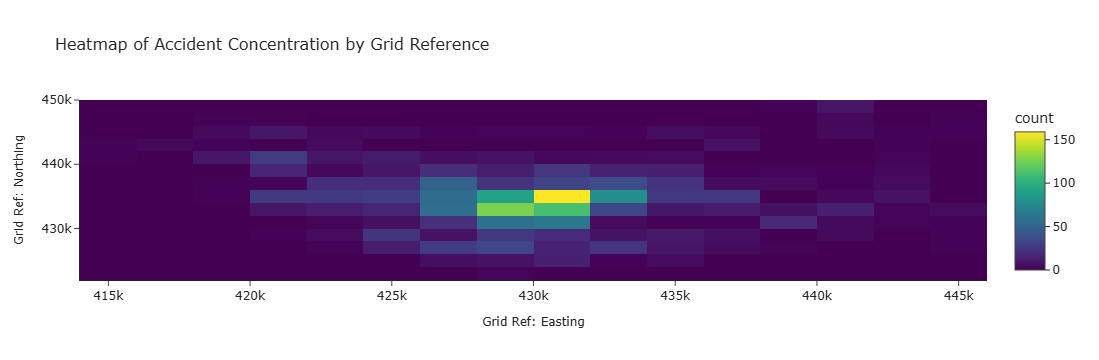

In [172]:
# Sample data creation (Replace this with your actual DataFrame)
# Ensure 'Grid Ref: Easting' and 'Grid Ref: Northing' columns exist in your data
# Create a density contour plot for accident concentration
fig_scatter_density = px.density_contour(
    df,
    x='Grid Ref: Easting',
    y='Grid Ref: Northing',
    title='Accident Concentration by Grid Reference (Density Contour)',
    labels={'Grid Ref: Easting': 'Easting', 'Grid Ref: Northing': 'Northing'}
)

# Customize layout for density contour
fig_scatter_density.update_layout(
    xaxis_title="Grid Ref: Easting",
    yaxis_title="Grid Ref: Northing",
    title_font_size=16,
    xaxis=dict(title_font_size=12),
    yaxis=dict(title_font_size=12),
    template="simple_white"
)

# Show the density contour plot
fig_scatter_density.show()

# Create a heatmap for accident concentration
fig_heatmap = px.density_heatmap(
    df,
    x='Grid Ref: Easting',
    y='Grid Ref: Northing',
    title='Heatmap of Accident Concentration by Grid Reference',
    labels={'Grid Ref: Easting': 'Easting', 'Grid Ref: Northing': 'Northing'},
    color_continuous_scale='Viridis'
)

# Customize layout for the heatmap
fig_heatmap.update_layout(
    xaxis_title="Grid Ref: Easting",
    yaxis_title="Grid Ref: Northing",
    title_font_size=16,
    xaxis=dict(title_font_size=12),
    yaxis=dict(title_font_size=12),
    template="simple_white"
)

# Show the heatmap
fig_heatmap.show()


#Are accidents concentrated in urban vs. rural areas?

Index(['Reference Number', 'Grid Ref: Easting', 'Grid Ref: Northing',
       'Number of Vehicles', 'Number of Casualties', 'Accident Date',
       'Time (24hr)', '1st Road Class', 'Road Surface', 'Lighting Conditions',
       'Weather Conditions', 'Casualty Class', 'Casualty Severity',
       'Sex of Casualty', 'Age of Casualty', 'Type of Vehicle', 'Day of Week',
       'Hour'],
      dtype='object')


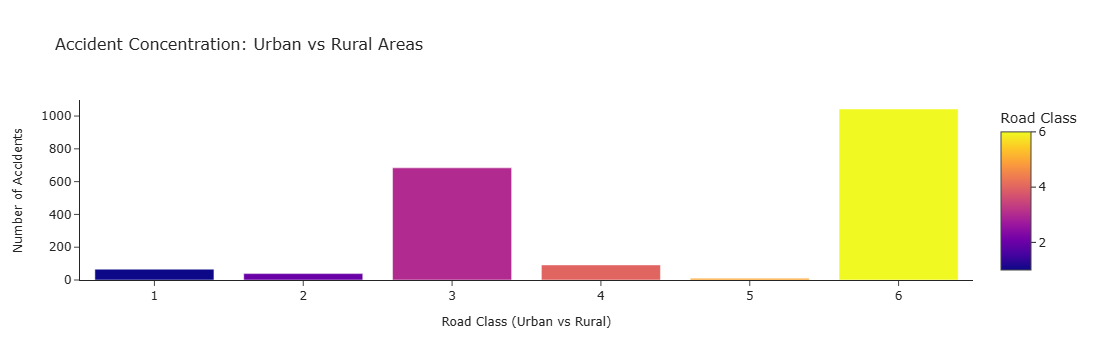

In [173]:

# Check column names
print(df.columns)

# Aggregate data by road class (urban vs rural)
road_class_counts = df.groupby('1st Road Class').size().reset_index(name='Number of Accidents')

# Create a bar chart for urban vs rural accident distribution
fig = px.bar(
    road_class_counts,
    x='1st Road Class',
    y='Number of Accidents',
    title='Accident Concentration: Urban vs Rural Areas',
    labels={'1st Road Class': 'Road Class', 'Number of Accidents': 'Accident Count'},
    color='1st Road Class',
    color_discrete_map={'Urban': 'blue', 'Rural': 'green'}  # Customize colors
)

# Customize layout
fig.update_layout(
    xaxis_title="Road Class (Urban vs Rural)",
    yaxis_title="Number of Accidents",
    title_font_size=16,
    xaxis=dict(title_font_size=12),
    yaxis=dict(title_font_size=12),
    showlegend=False,
    template="simple_white"
)

# Show the plot
fig.show()
